In [3]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x58ea8000 @  0x7fd6b5be82a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [4]:
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
!pip install ipdb

  Running setup.py bdist_wheel for ipdb ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/a8/0e/e2/ffc7bedd430bfd12e9dba3c4dd88906bc42962face85bc4df7
Successfully built ipdb


In [10]:

import torch
import torchvision
import ipdb
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import gzip
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from IPython.core.debugger import set_trace

train_data = datasets.MNIST('/Users/Chris/Downloads',train = True, download= True, transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_data = datasets.MNIST('/Users/Chris/Downloads',train = False, download= True, transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

criterion = nn.CrossEntropyLoss()
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()


        self.conv1 = nn.Conv2d(1, 32, 3, stride=2,padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, stride=2, padding=1)
        self.conv5 = nn.Conv2d(128, 128, 3, stride=2, padding=1)
        self.fc1 = nn.Linear(128, 100)
        self.fc2 = nn.Linear(100, 10)
        self.act = nn.Softmax()
        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = x.view(-1, self.num_flat_features(x))
        x = self.relu(self.fc1(x))
        x = self.act(self.fc2(x))
        return x
        # Activation function, editable

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
net = net.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.3)
net.zero_grad()
trainloader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=10000, shuffle=True)
dataiter = iter(trainloader)
i = 0
j = 0
count = 0
test_accuracy = 0
accuracy_vector = []
test_accuracy_vector = []

for j in range(0,100):
  dataiter = iter(trainloader)
  if test_accuracy > 0.94:
    break
  for batch in dataiter:
    print(j)
    image = batch[0]
    image = image*2 -1
    label = batch[1]
    # Transfer to GPU
    image, label = image.to(device), label.to(device)
    #print(net(local_batch))
    optimizer.zero_grad()
    output = net(image)
    #print(output.argmax(1))
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    i = i+1
    print(i)
    print(test_accuracy)
    print(loss)
    z = output.max(1)
    correct_guesses = z[1] == label
    correct_guesses = correct_guesses.type(torch.FloatTensor)
    accuracy = correct_guesses.mean()
    accuracy_vector.append(accuracy*100)
    count = count + 1
    if count == 25:
      testiter = iter(testloader)
      count = 0
      for test_batch in testiter:
        test_image = test_batch[0]
        test_image = test_image*2 -1
        test_label = test_batch[1]
        test_image, test_label = test_image.to(device), test_label.to(device)
        outputtest = net(test_image)
        ztest = outputtest.max(1)
        test_correct_guesses = ztest[1] == test_label
        test_correct_guesses = test_correct_guesses.type(torch.FloatTensor)
        test_accuracy = test_correct_guesses.mean()
        test_accuracy_vector.append(test_accuracy*100)
        break
    
   
 
  






0
1
0
tensor(2.3026, device='cuda:0', grad_fn=<NllLossBackward>)
0
2
0
tensor(2.3022, device='cuda:0', grad_fn=<NllLossBackward>)
0
3
0
tensor(2.3018, device='cuda:0', grad_fn=<NllLossBackward>)
0
4
0
tensor(2.3022, device='cuda:0', grad_fn=<NllLossBackward>)
0
5
0
tensor(2.3022, device='cuda:0', grad_fn=<NllLossBackward>)
0
6
0
tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward>)
0
7
0
tensor(2.3025, device='cuda:0', grad_fn=<NllLossBackward>)
0
8
0
tensor(2.3020, device='cuda:0', grad_fn=<NllLossBackward>)
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


9
0
tensor(2.3025, device='cuda:0', grad_fn=<NllLossBackward>)
0
10
0
tensor(2.3024, device='cuda:0', grad_fn=<NllLossBackward>)
0
11
0
tensor(2.3028, device='cuda:0', grad_fn=<NllLossBackward>)
0
12
0
tensor(2.3021, device='cuda:0', grad_fn=<NllLossBackward>)
0
13
0
tensor(2.3028, device='cuda:0', grad_fn=<NllLossBackward>)
0
14
0
tensor(2.3028, device='cuda:0', grad_fn=<NllLossBackward>)
0
15
0
tensor(2.3029, device='cuda:0', grad_fn=<NllLossBackward>)
0
16
0
tensor(2.3020, device='cuda:0', grad_fn=<NllLossBackward>)
0
17
0
tensor(2.3019, device='cuda:0', grad_fn=<NllLossBackward>)
0
18
0
tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward>)
0
19
0
tensor(2.3034, device='cuda:0', grad_fn=<NllLossBackward>)
0
20
0
tensor(2.3019, device='cuda:0', grad_fn=<NllLossBackward>)
0
21
0
tensor(2.3034, device='cuda:0', grad_fn=<NllLossBackward>)
0
22
0
tensor(2.3024, device='cuda:0', grad_fn=<NllLossBackward>)
0
23
0
tensor(2.3019, device='cuda:0', grad_fn=<NllLossBackward>)
0
24
0
tensor

In [0]:
loss = 1000

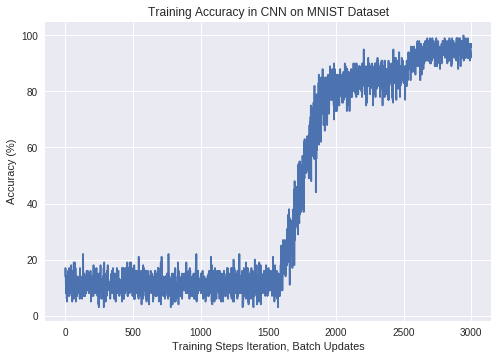

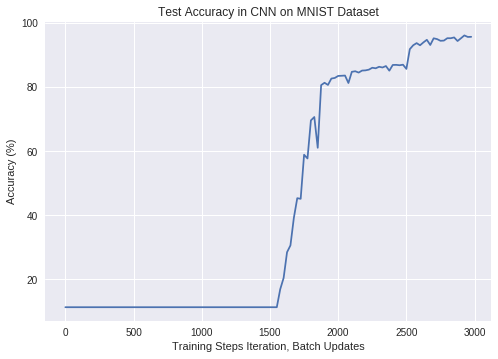

In [11]:
plt.plot(np.arange(len(accuracy_vector)),accuracy_vector)
plt.xlabel('Training Steps Iteration, Batch Updates')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy in CNN on MNIST Dataset')
plt.show()

plt.plot(25*np.arange(len(test_accuracy_vector)),test_accuracy_vector)
plt.xlabel('Training Steps Iteration, Batch Updates')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy in CNN on MNIST Dataset')
plt.show()

In [0]:
for epoch in range(1):
    # Training
    print(trainloader)
    for local_batch, local_labels in trainloader:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)
        #print(net(local_batch))
        optimizer.zero_grad()
        print(local_batch)
        output = net(local_batch)
        #print(output.argmax(1))
        loss = criterion(output, local_labels)
        loss.backward()
        optimizer.step()
        i = i+1
        if (i >50):
          break


In [0]:
while 0.5 < 0.99:

    optimizer.zero_grad()
    pdb.set_trace()
    output = net(train_data)
    loss = criterion(output, torch_targets)
    loss.backward()
    optimizer.step()
    # The main training inner-loop. Implements one step of SGD.
    #accuracy_vector.append(accuracy*100)
    #loss_vector.append(loss)
    # Accuracy and loss calculation and storage for performance evaluation.

    #print(accuracy)
    #print(loss)
    print('ran once')